<h1 align='center'> 파이썬과학프로그래밍기초 실습 4</h1>

<p style="text-align: right"> 2021.10.13</p>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   김대성          학번:    20185212         학과(전공):    스마트IoT
    
</div>

- Jupyter notebook에 대한 설명은 [The Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 실습 과제 제출 마감: 10월 16일 (토) 오후 6:00


#### 질문 1. 8-bit minifloat

다음과 같은 8-bit minifloat format이 있다고 가정하자.

<table style="border:1px solid black;">
    <thead>
        <tr>
            <th style="border:1px solid black;">b7</th>
            <th style="border:1px solid black;">b6</th>
            <th style="border:1px solid black;">b5</th>
            <th style="border:1px solid black;">b4</th>
            <th style="border:1px solid black;">b3</th>
            <th style="border:1px solid black;">b2</th>
            <th style="border:1px solid black;">b1</th>
            <th style="border:1px solid black;">b0</th>
        </tr>
        <tr>
            <td style="border:1px solid black;">sign (1 bit)</td>
            <td colspan=4 style="border:1px solid black;">q = e + 7 (4 btis)</td>
            <td colspan=3 style="border:1px solid black;">mantissa (3 btis))</td>
        </tr>
    </thead>
    
</table>

위 형식으로 표현된 8 bits 이진수를 10 진수 실수로 변환하면 다음과 같다.

$$x=(-1)^s×(1.b_2 b_1 b_0)_2×2^e=(-1)^s×(1.b_2 b_1 b_0)_2×2^{q-7}$$

여기에서, 다음 4 가지 이진수는 다음과 같은 의미를 갖는다고 정의하자.
- 0 0000 000 = 0
- 1 0000 000 = -0
- 0 1111 000 = +infinity
- 1 1111 000 = -infinity

1) 0 1011 111 $ = (-1)^0×(1.111)_2×2^{11-7}=(1.111)_2×2^{4}=(11110)_2 = 30$

2) 0 0011 011 $ = (-1)^0×(1.011)_2×2^{3-7}=(1.011)_2×2^{-4}=(0.0001011)_2 = 0.0859375$

3) 1 0110 101 $ = (-1)^1×(1.101)_2×2^{6-7}=-(1.101)_2×2^{-1}=-(0.1101)_2 = -0.8125$


In [1]:
minifloat = '01011111'
minifloat = '00011011'
minifloat = '10110101' 

if minifloat == "00000000":
    converted = 0.0
elif minifloat == '10000000':
    converted = -0.0
elif minifloat == '01111000':
    converted = float('inf')
elif minifloat == '11111000':
    converted = -float('inf')

# check sign bit
if minifloat[0] == '0':
    sign = 1 
else:
    sign = -1

#한줄로 바꾸기
#sign = 1 if minifloat[0] == '0' else -1
    
# calculate mantissa with minifloat[-3:]
#mantissa = 1 + int(minifloat[-3]) / 2**1 + int(minifloat[-2]) / 2 ** 2 + int(minifloat[-1]) / 2 ** 3

mantissa = 1.
for n, b in enumerate(minifloat[-3:]):
    if b == '1':
        mantissa += 1/2**(n+1)

#한줄로 바꾸기
#manissa = sum([1/2**(n+1) for n, b in enumerate(minifloat[-3:]) if b == '1'], 1)

#calculate exponent
#e = int(minifloat[1]) * 2**3 + int(minifloat[2]) * 2**2 + int(minifloat[3]) * 2**1 + int(minifloat[4]) * 2**0 - 7
e = -7
for n, b in enumerate(minifloat[1:5]):
    if b == '1':
        e += 2**(3-n)

#한줄로 바꾸기
#e = sum([2**(3-n) for n, b in enumerate(minifloat[1:5]) if b == '1'], -7)

mantissa *= 2**e
converted = sign*mantissa

print(converted)

-0.8125


#### 질문 2.

Hash table이 리스트와 딕셔너리의 속도 차이에 미치는 영향

In [2]:
lst = [1, 3, 5, 7, 9, 10]
7 in lst

True

In [3]:
s = {1, 3, 5, 7, 9, 10} # index 없음
7 in s

True

#### 질문 3.
```
print((1<2) or (2>3)) #True
print((1<2) | (2>3)) #True
print(1<2 or 2>3) #True
print(1<2 | 2>3) #False
```

In [4]:
print((1<2) or (2>3)) #True
print((1<2) | (2>3)) #True
print(1<2 or 2>3) #True
print(1<2 | 2>3) #False
print((1<2) | (2>3)) #연산자 우선순위에 의한 결과 차이

True
True
True
False
True


csv : comma-seperated values

#### 예제 1.

fake_student_records.csv 파일은 2031년도 파이썬고급프로그래밍 수업을 듣는 **가상의** 학생들의 이름, 학번, 소속, 그리고 6 번의 시험 점수를 dictionary 형식으로 기록한 것이다. 

(학생들의 이름과 학번은 현재 파이썬프로그래밍기초 수업을 듣는 학생들의 이름을 임의로 조작하여 만든 가상의 이름과 학번입니다.)

아래 셀의 프로그램은 'fake_student_records.csv' 파일의 각 라인을 읽어서 리스트로 만들어 콘솔에 출력하는 것이다.

아래 프로그램을 실행하여 보라.

In [5]:
import csv #,로 구분된 파일
with open('fake_student_records.csv', mode='r', encoding='utf-8') as student_record_file: #with 파일 open, close 한번에 처리
    csv_reader = csv.reader(student_record_file)
    for line in csv_reader:
        print(line)

['이름', '학번', '소속', '학년', '시험1', '시험2', '시험3', '시험4', '시험5', '시험6']
['조준혁', '20257329', '일본학과', '3', '61', '69', '46', '79', '57', '77']
['이중석', '20287434', '심리학과', '2', '83', '55', '76', '62', '62', '64']
['정은영', '20297500', '경제학과', '2', '57', '61', '61', '72', '98', '84']
['조동욱', '20277510', '경제학과', '3', '52', '77', '87', '96', '72', '63']
['김승헌', '20317424', '경영학과', '3', '83', '90', '93', '71', '89', '92']
['정궁윤', '20299281', '생명과학과', '3', '96', '72', '94', '52', '76', '84']
['김민훈', '20317448', '의과학융합전공', '3', '77', '60', '73', '87', '56', '88']
['김동우', '20267372', '소프트웨어융합대학', '1', '58', '47', '92', '61', '49', '70']
['김동석', '20277452', '소프트웨어융합대학', '1', '97', '82', '77', '58', '95', '55']
['윤궁기', '20267389', '소프트웨어융합대학', '1', '43', '67', '63', '90', '44', '85']
['류준은', '20327362', '소프트웨어융합대학', '1', '97', '84', '85', '54', '50', '97']
['김원하', '20277501', '소프트웨어융합대학', '1', '88', '58', '75', '65', '81', '61']
['홍현주', '20297449', '소프트웨어융합대학', '1', '71', '99', '99', '59', '87', '97']
['

#### 예제 2.

아래 셀의 프로그램은 'fake_student_records.csv' 파일의 각 라인을 읽어 Dictionary로 만들어 콘솔에 출력하는 것이다.

아래 프로그램을 실행하여 보라.

In [6]:
#import csv
with open('fake_student_records.csv', mode='r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        print(row)

{'이름': '조준혁', '학번': '20257329', '소속': '일본학과', '학년': '3', '시험1': '61', '시험2': '69', '시험3': '46', '시험4': '79', '시험5': '57', '시험6': '77'}
{'이름': '이중석', '학번': '20287434', '소속': '심리학과', '학년': '2', '시험1': '83', '시험2': '55', '시험3': '76', '시험4': '62', '시험5': '62', '시험6': '64'}
{'이름': '정은영', '학번': '20297500', '소속': '경제학과', '학년': '2', '시험1': '57', '시험2': '61', '시험3': '61', '시험4': '72', '시험5': '98', '시험6': '84'}
{'이름': '조동욱', '학번': '20277510', '소속': '경제학과', '학년': '3', '시험1': '52', '시험2': '77', '시험3': '87', '시험4': '96', '시험5': '72', '시험6': '63'}
{'이름': '김승헌', '학번': '20317424', '소속': '경영학과', '학년': '3', '시험1': '83', '시험2': '90', '시험3': '93', '시험4': '71', '시험5': '89', '시험6': '92'}
{'이름': '정궁윤', '학번': '20299281', '소속': '생명과학과', '학년': '3', '시험1': '96', '시험2': '72', '시험3': '94', '시험4': '52', '시험5': '76', '시험6': '84'}
{'이름': '김민훈', '학번': '20317448', '소속': '의과학융합전공', '학년': '3', '시험1': '77', '시험2': '60', '시험3': '73', '시험4': '87', '시험5': '56', '시험6': '88'}
{'이름': '김동우', '학번': '20267372', '소속': '소프트웨어융합대학', 

#### 예제 3.
이 dictionary에서 학번과 모든 시험 점수를 문자열에서 정수형으로 바꾸고, 시험 점수의 합계와 평균을 다음과 같이 추가하라. 평균은 소숫점 둘째자리에서 반올림해야 한다.

예를 들어 첫 학생의 key:value는 다음과 같이 수정된다.
```
{'이름': '조준혁', '학번': 20257329, '소속': '일본학과', '학년': '3', '시험1': 61, '시험2': 69, '시험3': 46, '시험4': 79, '시험5': 57, '시험6': 77, '합계': 389, '평균': 64.83}
```

수정한 후에 학생의 이름을 키보드로 입력 받은 후에 학생의 이름, 합계, 평균을 console에 출력하는 프로그램을 작성하라. 단, 평균은 소숫점 둘째 자리까지 표시하라.



In [7]:
import csv
student_records = []
with open('fake_student_records.csv', mode='r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        hap = 0
        row['학번'] = int(row['학번'])
        row['시험1'] = int(row['시험1'])
        hap += row['시험1']
        row['시험2'] = int(row['시험2'])
        hap += row['시험2']
        row['시험3'] = int(row['시험3'])
        hap += row['시험3']
        row['시험4'] = int(row['시험4'])
        hap += row['시험4']
        row['시험5'] = int(row['시험5'])
        hap += row['시험5']
        row['시험6'] = int(row['시험6'])
        hap += row['시험6']
        row['합계'] = hap
        avg = round(hap/6, 2)
        row['평균'] = avg
        print(row)

{'이름': '조준혁', '학번': 20257329, '소속': '일본학과', '학년': '3', '시험1': 61, '시험2': 69, '시험3': 46, '시험4': 79, '시험5': 57, '시험6': 77, '합계': 389, '평균': 64.83}
{'이름': '이중석', '학번': 20287434, '소속': '심리학과', '학년': '2', '시험1': 83, '시험2': 55, '시험3': 76, '시험4': 62, '시험5': 62, '시험6': 64, '합계': 402, '평균': 67.0}
{'이름': '정은영', '학번': 20297500, '소속': '경제학과', '학년': '2', '시험1': 57, '시험2': 61, '시험3': 61, '시험4': 72, '시험5': 98, '시험6': 84, '합계': 433, '평균': 72.17}
{'이름': '조동욱', '학번': 20277510, '소속': '경제학과', '학년': '3', '시험1': 52, '시험2': 77, '시험3': 87, '시험4': 96, '시험5': 72, '시험6': 63, '합계': 447, '평균': 74.5}
{'이름': '김승헌', '학번': 20317424, '소속': '경영학과', '학년': '3', '시험1': 83, '시험2': 90, '시험3': 93, '시험4': 71, '시험5': 89, '시험6': 92, '합계': 518, '평균': 86.33}
{'이름': '정궁윤', '학번': 20299281, '소속': '생명과학과', '학년': '3', '시험1': 96, '시험2': 72, '시험3': 94, '시험4': 52, '시험5': 76, '시험6': 84, '합계': 474, '평균': 79.0}
{'이름': '김민훈', '학번': 20317448, '소속': '의과학융합전공', '학년': '3', '시험1': 77, '시험2': 60, '시험3': 73, '시험4': 87, '시험5': 56, '시험6': 88, '합계': 44

In [8]:
import csv
student_records = []
exams = ['시험1', '시험2', '시험3', '시험4', '시험5', '시험6'] #헤더를 안다고 가정할 때
exam_count = len(exams)
with open('fake_student_records.csv', mode='r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        row['학번'] = int(row['학번'])
        total = 0
        for exam in exams:
            row[exam] = int(row[exam])
            total += row[exam]
        row['합계'] = total
        row['평균'] = round(total / exam_count, 2)
        print(row)

{'이름': '조준혁', '학번': 20257329, '소속': '일본학과', '학년': '3', '시험1': 61, '시험2': 69, '시험3': 46, '시험4': 79, '시험5': 57, '시험6': 77, '합계': 389, '평균': 64.83}
{'이름': '이중석', '학번': 20287434, '소속': '심리학과', '학년': '2', '시험1': 83, '시험2': 55, '시험3': 76, '시험4': 62, '시험5': 62, '시험6': 64, '합계': 402, '평균': 67.0}
{'이름': '정은영', '학번': 20297500, '소속': '경제학과', '학년': '2', '시험1': 57, '시험2': 61, '시험3': 61, '시험4': 72, '시험5': 98, '시험6': 84, '합계': 433, '평균': 72.17}
{'이름': '조동욱', '학번': 20277510, '소속': '경제학과', '학년': '3', '시험1': 52, '시험2': 77, '시험3': 87, '시험4': 96, '시험5': 72, '시험6': 63, '합계': 447, '평균': 74.5}
{'이름': '김승헌', '학번': 20317424, '소속': '경영학과', '학년': '3', '시험1': 83, '시험2': 90, '시험3': 93, '시험4': 71, '시험5': 89, '시험6': 92, '합계': 518, '평균': 86.33}
{'이름': '정궁윤', '학번': 20299281, '소속': '생명과학과', '학년': '3', '시험1': 96, '시험2': 72, '시험3': 94, '시험4': 52, '시험5': 76, '시험6': 84, '합계': 474, '평균': 79.0}
{'이름': '김민훈', '학번': 20317448, '소속': '의과학융합전공', '학년': '3', '시험1': 77, '시험2': 60, '시험3': 73, '시험4': 87, '시험5': 56, '시험6': 88, '합계': 44

#### 예제 4.

'fake_student_records.csv' 파일에 기록된 학생들이 속한 소속을 콘솔에 출력하라. 단, 중복되는 곳은 한 번만 출력하라. 

답은 다음과 같다.

```
{'스마트IoT전공', '생명과학과', '심리학과', '소프트웨어융합대학', '빅데이터전공', '전자공학과', '의과학융합전공', '콘텐츠IT전공', '일본학과', '경제학과', '컴퓨터공학과', 'ICT융합전공', '경영학과'}
```

In [9]:
unique_dept_names = set()
with open('fake_student_records.csv', mode='r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        unique_dept_names.add(row['소속'])
print(unique_dept_names)

{'컴퓨터공학과', '생명과학과', '빅데이터전공', '전자공학과', '소프트웨어융합대학', '스마트IoT전공', '경제학과', '심리학과', '일본학과', 'ICT융합전공', '콘텐츠IT전공', '의과학융합전공', '경영학과'}


#### 예제 5.

'fake_student_records.csv' 파일에 기록된 학생들의 소속 별 분포는 다음과 같다. (문제 1)

{'ICT융합전공': 1,
 '경영학과': 1,
 '경제학과': 2,
 '빅데이터전공': 11,
 '생명과학과': 1,
 '소프트웨어융합대학': 7,
 '스마트IoT전공': 5,
 '심리학과': 1,
 '의과학융합전공': 1,
 '일본학과': 1,
 '전자공학과': 3,
 '컴퓨터공학과': 1,
 '콘텐츠IT전공': 3}
 
 
소속별 학생 수를 막대 그래프로 그리는 프로그램을 작성하라.

```
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumMyeongjo' # 각자 자신이 좋아하는 폰트를 사용할 수 있음
plt.bar( ...,  ... )
plt.xticks( ..., ...)
plt.show()
```

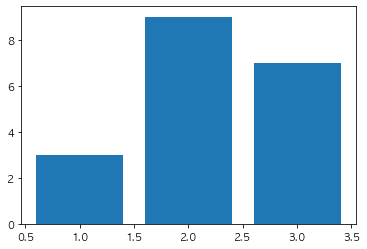

In [24]:
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = 'NanumMyeongjo'
#Max에서 사용시
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.bar([1, 2, 3], [3, 9, 7])
#plt.xticks([1, 2, 3], ['하나', '둘', '셋'])
plt.show()

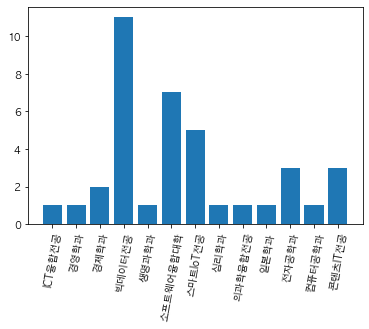

In [27]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
#plt.rcParams["font.family"] = 'NanumMyeongjo'
student_no_per_dept = {'ICT융합전공': 1, '경영학과': 1, '경제학과': 2, '빅데이터전공': 11, '생명과학과': 1, '소프트웨어융합대학': 7, '스마트IoT전공': 5, '심리학과': 1, '의과학융합전공': 1, '일본학과': 1, '전자공학과': 3, '컴퓨터공학과': 1, '콘텐츠IT전공': 3}
plt.bar(range(len(student_no_per_dept)), student_no_per_dept.values())
plt.xticks(range(len(student_no_per_dept)), student_no_per_dept.keys(), rotation=80)
plt.show()

#### 예제 6.
'fake_student_records.csv' 파일에 의하면 모든 학생이 여섯 번의 시험을 보았다. 시험 시행 차수 별 평균과 표준 편차를 구하고, 막대 그래프로 표시하라.

$$\mu = \frac{1}{N} \sum_{n=1}^{N} x_n, \;\; \sigma = \sqrt{\frac{1}{N} \sum_{n=1}^{N} (x_n-\mu)^2} $$

아래 메쏘드를 사용할 때, yerr argument에 표준 편차를 지정하면 된다.

```
matplotlob.pyplot.bar()
```

In [29]:
import statistics

x = [1, 3, 5, 7, 9]
print(statistics.mean(x))
print(statistics.stdev(x))

5
3.1622776601683795


In [30]:
print(statistics.stdev(x))

3.1622776601683795


In [31]:
exam_scores = {exam:[] for exam in exams}
with open('fake_student_records.csv', mode='r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        for exam in exams:
            exam_scores[exam].append(int(row[exam]))
average = {exam:0 for exam in exams}
std_dev = {exam:0 for exam in exams}
for exam in exams:
    average[exam] = statistics.mean(exam_scores[exam])
    std_dev[exam] = statistics.stdev(exam_scores[exam])
print(average)
print(std_dev)

{'시험1': 76.36842105263158, '시험2': 75.92105263157895, '시험3': 75.6842105263158, '시험4': 72.05263157894737, '시험5': 72.44736842105263, '시험6': 76.78947368421052}
{'시험1': 18.19031677752127, '시험2': 15.003389849301659, '시험3': 16.619924973255536, '시험4': 13.118889555061234, '시험5': 17.266899075932404, '시험6': 14.590181620374196}


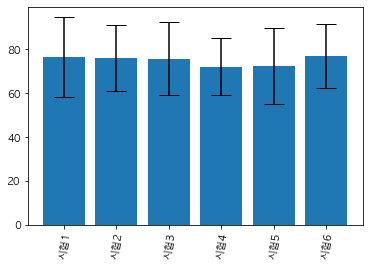

In [32]:
plt.bar(range(len(exams)), average.values(), yerr = std_dev.values(), capsize = 10)
plt.xticks(range(len(exams)), exams, rotation = 80)
plt.show()

#### 예제 7

다음과 같이 주어지는 두 개의 리스트가 있다.
```
lst_1 = [1, 10, 9, 5, 3, 3, 2, 1, 7, 8]
lst_2 = [1, 2, 11, 15, 6, 3, 3, 6]
```

set을 이용하여 lst_1과 lst_2에 공통적으로 있는 원소들을 원소로 갖는 리스트 lst 를 만들어라.
단, 원소의 크기는 오름차순으로 정렬되어야 한다.
답은 다음과 같아야 한다.
```
lst: [1, 2, 3]
```

In [33]:
lst_1 = [1, 10, 9, 5, 3, 3, 2, 1, 7, 8]
lst_2 = [1, 2, 11, 15, 6, 3, 3, 6]
lst = sorted(list(set(lst_1).intersection(set(lst_2))))
lst

[1, 2, 3]

In [34]:
lst_1 = [1, 10, 9, 5, 3, 3, 2, 1, 7, 8]
lst_2 = [1, 2, 11, 15, 6, 3, 3, 6]
lst = []
for e in lst_1:
    if e in lst_2 and e not in lst:
        lst.append(e)
lst = sorted(lst)
lst

[1, 2, 3]

#### 문제 1.

예제 3에서 사용한 'fake_student_records.csv' 파일에서 학생들의 소속 학과(전공)의 이름을 원소로 가진 리스트 unique_dept_names를 구하라.
 단, 소속 이름은 오름차순으로 정렬하라.

결과는 다음과 같아야 한다.
 ```
 ['ICT융합전공',
 '경영학과',
 '경제학과',
 '빅데이터전공',
 '생명과학과',
 '소프트웨어융합대학',
 '스마트IoT전공',
 '심리학과',
 '의과학융합전공',
 '일본학과',
 '전자공학과',
 '컴퓨터공학과',
 '콘텐츠IT전공']
 ```

In [51]:
import csv
unique_dept_names = []
with open('fake_student_records.csv', mode='r', encoding='utf-8') as student_record_file:
    csv_reader = csv.DictReader(student_record_file)
    for row in csv_reader:
        if (row['소속'] not in unique_dept_names):
            unique_dept_names.append(row['소속'])
unique_dept_names = sorted(unique_dept_names)
print(unique_dept_names)

['ICT융합전공', '경영학과', '경제학과', '빅데이터전공', '생명과학과', '소프트웨어융합대학', '스마트IoT전공', '심리학과', '의과학융합전공', '일본학과', '전자공학과', '컴퓨터공학과', '콘텐츠IT전공']


#### 문제 2. 

'fake_student_records.csv' 파일에서 각 소속별 학생들의 수를 dictionary를 이용해서 표현하고, 콘솔에 출력하라.

답은 다음과 같다.

```
{'ICT융합전공': 1,
 '경영학과': 1,
 '경제학과': 2,
 '빅데이터전공': 11,
 '생명과학과': 1,
 '소프트웨어융합대학': 7,
 '스마트IoT전공': 5,
 '심리학과': 1,
 '의과학융합전공': 1,
 '일본학과': 1,
 '전자공학과': 3,
 '컴퓨터공학과': 1,
 '콘텐츠IT전공': 3}
 ```

In [113]:
#import csv
unique_dept_counts = {} #학과별 학생수

with open('fake_student_records.csv', mode='r', encoding='utf-8') as student_record_file:
    csv_reader = csv.DictReader(student_record_file)
    for dept in unique_dept_names: #학과 이름리스트를 키로 이용
        unique_dept_counts[dept] = 0
    for row in csv_reader:
        unique_dept_counts[row['소속']] += 1
        
print(unique_dept_counts)

{'ICT융합전공': 1, '경영학과': 1, '경제학과': 2, '빅데이터전공': 11, '생명과학과': 1, '소프트웨어융합대학': 7, '스마트IoT전공': 5, '심리학과': 1, '의과학융합전공': 1, '일본학과': 1, '전자공학과': 3, '컴퓨터공학과': 1, '콘텐츠IT전공': 3}


#### 문제 3.
'fake_student_records.csv' 파일에서 입학연도별 학생 수를 구하고 막대 그래프로 그려라.

In [147]:
#입학년도별 -> 학번수
student_number_count = {} #입학연도별 학생 수

with open('fake_student_records.csv', mode='r', encoding='utf-8') as student_record_file:
    csv_reader = csv.DictReader(student_record_file)
    for row in csv_reader:
        row = row['학번'][0:4] #학생의 입학년도를 row에 저장
        if(row not in student_number_count.keys()): # row가 학생수 딕셔너리의 키에 없으면 키를 저장 후 0으로 초기화
            student_number_count[row] = 0
        student_number_count[row] += 1 

print(student_number_count) # 정렬X

{'2025': 4, '2028': 4, '2029': 6, '2027': 8, '2031': 4, '2026': 5, '2032': 3, '2030': 4}


In [148]:
#정렬된 year_list
year_list = []
with open('fake_student_records.csv', mode='r', encoding='utf-8') as student_record_file:
    csv_reader = csv.DictReader(student_record_file)
    for row in csv_reader:
        row = row['학번'][0:4]
        if(row not in year_list):
            year_list.append(row)
    year_list = sorted(year_list)
    
for year in year_list: # year_list를 이용해 student_number_count 초기화
    student_number_count[year] = 0

print(year_list)
print(student_number_count)

['2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032']
{'2025': 0, '2028': 0, '2029': 0, '2027': 0, '2031': 0, '2026': 0, '2032': 0, '2030': 0}


In [149]:
with open('fake_student_records.csv', mode='r', encoding='utf-8') as student_record_file:
    csv_reader = csv.DictReader(student_record_file)
    for row in csv_reader:
        row = row['학번'][0:4]
        student_number_count[row] += 1

print(student_number_count) #정렬됨

{'2025': 4, '2028': 4, '2029': 6, '2027': 8, '2031': 4, '2026': 5, '2032': 3, '2030': 4}


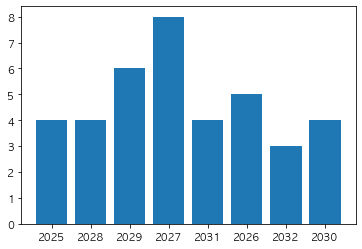

In [153]:
plt.bar(range(len(student_number_count)), student_number_count.values())
plt.xticks(range(len(student_number_count)), student_number_count.keys())
plt.show()